In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import re
from collections import defaultdict

/Users/hackinteachk./.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [66]:
data = defaultdict(list)
with open("mem_result.txt", "r") as f:
    while f.readable():
        f.readline()
        n = f.readline()
        num = re.match(r"^\[([0-9]{1,2})\]$" ,n).group(1)
        for i in range(4):
            value = np.float(f.readline().strip("\n"))
            data[num].append(value)
        if num == "60":
            break

In [67]:
x = list(map(int, data.keys()))
y = np.array(list(data.values()))

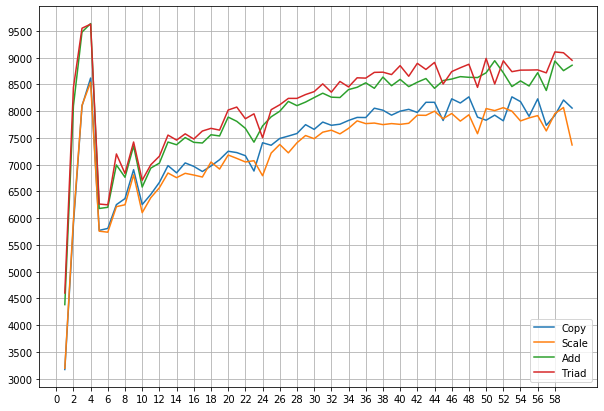

In [68]:
labels=["Copy", "Scale", "Add", "Triad"]
plt.figure(figsize=(10,7))
for i, l in enumerate(labels):
    plt.plot(x,y[:,i], label=l)
plt.legend()
plt.xticks(ticks=np.arange(0, len(data), 2));
plt.yticks(ticks=np.arange(3000, 10_000, 500));
plt.grid()

In [3]:
from json import load
import os

In [4]:
os.listdir("output")

['flatten_result.json', 'map_result.json']

In [10]:
di=load(open("output/map_result.json"))
data = dict()
for k, v in di.items():
    func, fn, nthr, ver = list(map(str.strip, k.split(",")))
    fn = int(re.match(r"^data/map/size-(\d{1,}).csv$", fn).group(1))
    if func not in data:
        data[func] = dict()
    if fn not in data[func]:
        data[func][fn] = dict()
    data[func][fn][ver] = v["nanos"]

In [15]:
from pprint import pprint
pprint(data)

{'Fac': {1024: {'half_split': 31991, 'rayon_par_iter': 150825, 'sqrt_n': 42843},
         2048: {'half_split': 39049, 'rayon_par_iter': 237030, 'sqrt_n': 53004},
         4096: {'half_split': 49402, 'rayon_par_iter': 358865, 'sqrt_n': 78896},
         8192: {'half_split': 62211, 'rayon_par_iter': 589724, 'sqrt_n': 98027},
         16384: {'half_split': 75926,
                 'rayon_par_iter': 762666,
                 'sqrt_n': 107533},
         32768: {'half_split': 107818,
                 'rayon_par_iter': 1135364,
                 'sqrt_n': 128175},
         65536: {'half_split': 173115,
                 'rayon_par_iter': 1512971,
                 'sqrt_n': 192503},
         131072: {'half_split': 324666,
                  'rayon_par_iter': 2119928,
                  'sqrt_n': 336113},
         262144: {'half_split': 643755,
                  'rayon_par_iter': 2955079,
                  'sqrt_n': 674624},
         524288: {'half_split': 1367042,
                  'rayon_par_iter': 

half_split
rayon_par_iter
sqrt_n
half_split
rayon_par_iter
sqrt_n


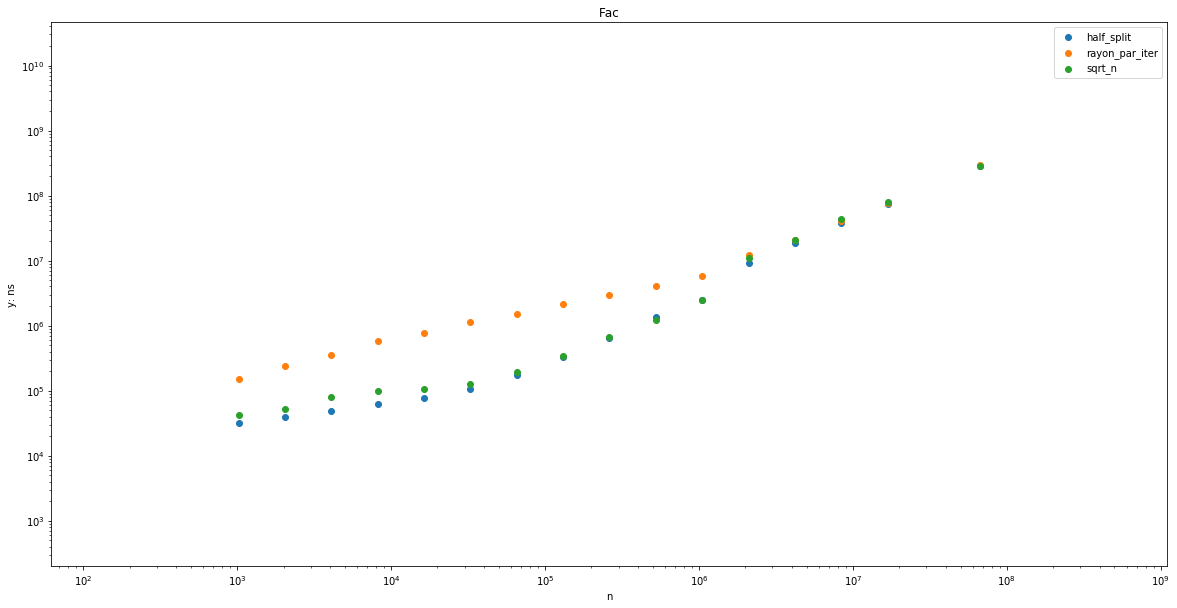

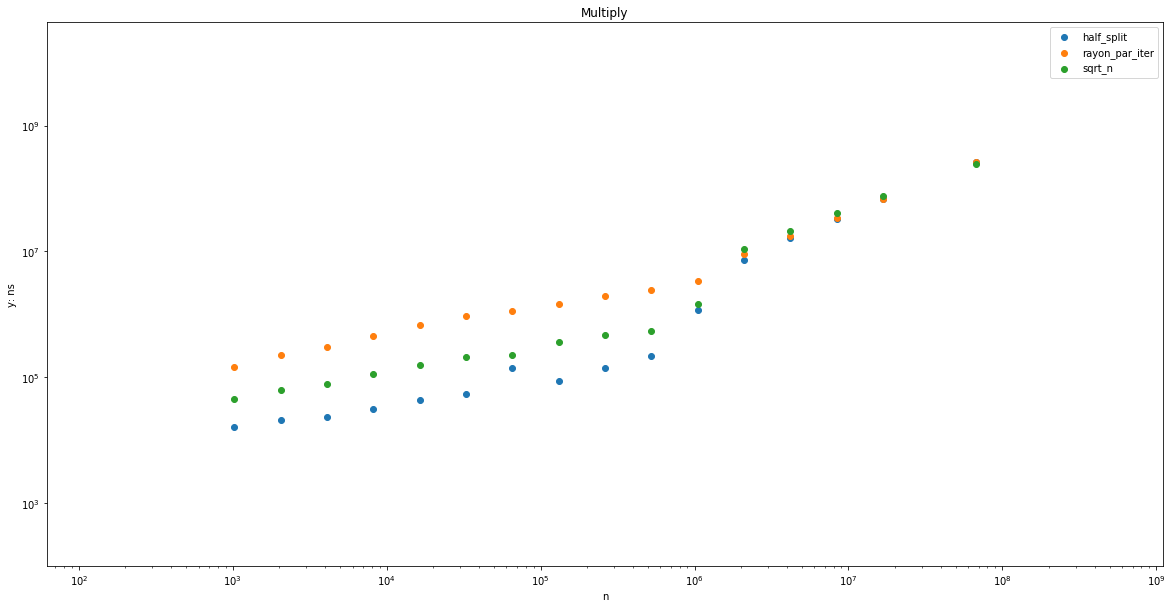

In [23]:
result = dict()

for alg, d in data.items():
    result[alg] = dict()
    for size, map_ver in d.items():
        for ver, tm in map_ver.items():
            if ver not in result[alg]:
                result[alg][ver] = {"x":[], "y": []}
            result[alg][ver]["x"].append(size)
            result[alg][ver]["y"].append(tm)
for alg, vers in result.items():
    plt.figure(figsize=(20,10))
    plt.title(alg)
    plt.xlabel("n")
    plt.ylabel("y: ns")
    plt.xscale("log")
    plt.yscale("log")
    for v, pts in vers.items():
        print(v)
        plt.scatter(pts['x'], pts['y'], label=v, marker='o')
    plt.legend()

flatten


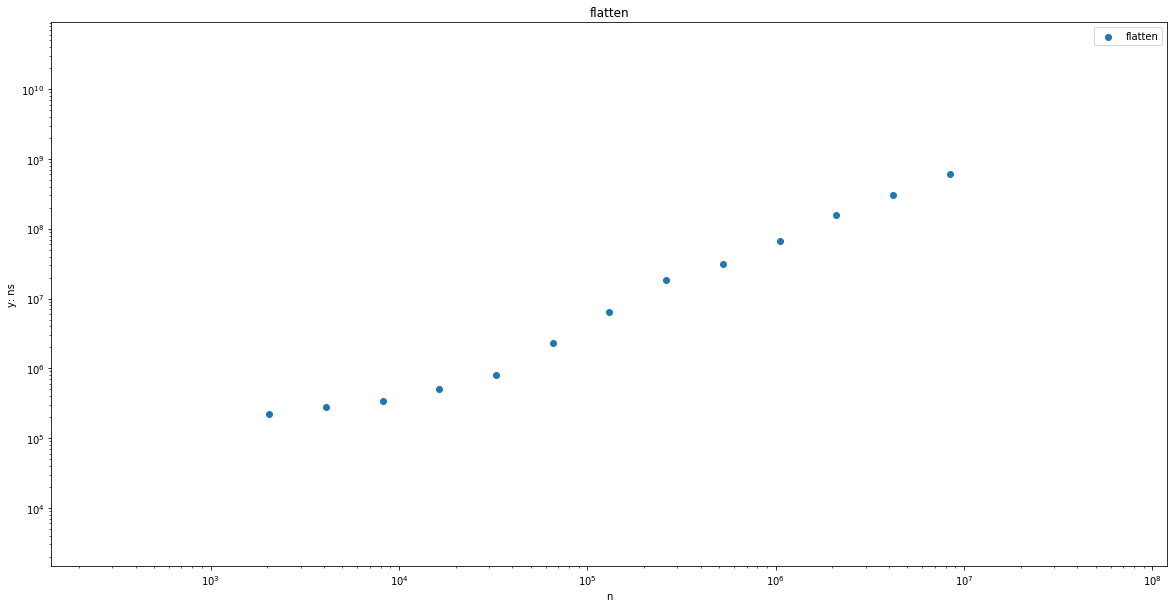

In [33]:
flt = load(open("output/flatten_result.json"))
data = dict()
for k, v in flt.items():
    fn, nthr, func = list(map(str.strip, k.split(",")))

    fn = int(re.match(r"^data/flatten/size-(\d{1,}).csv$", fn).group(1))
    if func not in data:
        data[func] = dict()
    if fn not in data[func]:
        data[func][fn] = dict()
    data[func][fn][ver] = v["nanos"]
result = dict()

for alg, d in data.items():
    result[alg] = dict()
    for size, map_ver in d.items():
        for ver, tm in map_ver.items():
            if ver not in result[alg]:
                result[alg][ver] = {"x":[], "y": []}
            result[alg][ver]["x"].append(size)
            result[alg][ver]["y"].append(tm)
for alg, vers in result.items():
    plt.figure(figsize=(20,10))
    plt.title(alg)
    plt.xlabel("n")
    plt.ylabel("y: ns")
    plt.xscale("log")
    plt.yscale("log")
    for v, pts in vers.items():
        print(v)
        plt.scatter(pts['x'], pts['y'], label=v, marker='o')
    plt.legend()